## Exploration and Experimentation

## Disclaimer
Following exploratory analysis from the last project selected (Analyzing app usage to predict gender/age). It became clear that the project was not feasible in the given timeframe. Hence, pivoted topics to predicting web page traffic for Wikipedia pages

## Problem Statement
With the digital transformation well on the way, it has become simplier and easier for small businesses to tap into the wealth that the internet has to offer. SMEs can utilize the internet to tap into markets/demand which is foreign to their locale. The same applies for large businesses, which in recent years have become fully integrated with the internet with zero to no brick and mortar stores (Amazon, Alibaba, Lazada etc). The issue here, is the marginal costs which are associated with the hosting of the site and the service. Since the internet opens up demand for products; it also opens up competition from rivals across the globe. This leads to a pricing war to the bottom. The vendor with the lowest margins or largest economies of scale tend to win if there is no differentiation in products. 

Hence, I'll be looking at the fixed costs associated with hosting a site against web traffic. The more traffic you have, generally the more revenue generated - if we can predict the web traffic per page, it would greatly aid in the process of allocating bandwidth where necessary and minimize costs associated with hosting pages or servers. 

Today, we'll be looking at Wikipedia - the largest collection of collective information in the world; to attempt to predict web traffic based on historical traffic.


## Methods and Models
We could use the ARIMA, ARMA models or FB Prophet to predict the possible traffic for the coming months/years. 

## Outstanding Questions/Assumptions/Risks/Caveats
Outstanding Questions: Nil - use cases should be reviewed

Assumptions: Assuming that the distribution of data is accurate and representative of general traffic of similar topics. Also assuming that interest in topics generally average out or taper off over time. 

Risks: Confounding Variables

Caveats: Even if we use ARIMA which penalizes sudden spikes in the data, the model would probably not accurately account for seasonality, spikes of interest (election dates etc) or any other confounding variables.

## Goals & Criteria
Goal: To be able to get a simple model of predicting web traffic for specific pages - applicable to any page in the dataset.

Success Criteria: Compare actual to predicted data to see the fit - a model which would be able to depict possible changes in traffic as time goes on

## Domain Knowledge
After some searching - it is apparent that it is difficult ot predict human traffic on webpages due to either seasonality or random events which occur. However, it is possible to predict with some degree of certainty how the frequency of web traffic would change based on previous history. This is of couse under the assumption that frequency remains consistent due to averaging out over time (see assumptions)

## Hypothesis
Null Hypothesis: There is no relationship between historical traffic and predicted traffic, making predictions impossible

Alternative Hypothesis: There is a relationship between historical traffic and future traffic, generating a close fit between actual and predicted datapoints

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("../Data/Dataset-Wiki/train_1.csv")

## Data Dictionary

7 Languages present:

en = English

ja = Japanese

de = German

na = Media

fr = French

zh = Chinese

ru = Russian

es = Spanish

In [6]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
train = data.set_index("Page").T

In [8]:
train.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Columns: 145063 entries, 2NE1_zh.wikipedia.org_all-access_spider to Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
dtypes: float64(145063)
memory usage: 608.7+ MB


In [10]:
train.index = train.index.to_datetime()

In [11]:
train.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
train.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=550, freq=None)

In [14]:
train["2015"]

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-06,9.0,13.0,4.0,26.0,NaN,8.0,NaN,127.0,9.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-07,9.0,22.0,0.0,14.0,NaN,5.0,NaN,53.0,35.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08,22.0,11.0,3.0,9.0,NaN,17.0,NaN,37.0,15.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09,26.0,10.0,4.0,11.0,NaN,24.0,NaN,20.0,14.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-10,24.0,4.0,4.0,16.0,NaN,7.0,NaN,32.0,22.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
train.columns

Index([u'2NE1_zh.wikipedia.org_all-access_spider',
       u'2PM_zh.wikipedia.org_all-access_spider',
       u'3C_zh.wikipedia.org_all-access_spider',
       u'4minute_zh.wikipedia.org_all-access_spider',
       u'52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider',
       u'5566_zh.wikipedia.org_all-access_spider',
       u'91Days_zh.wikipedia.org_all-access_spider',
       u'A'N'D_zh.wikipedia.org_all-access_spider',
       u'AKB48_zh.wikipedia.org_all-access_spider',
       u'ASCII_zh.wikipedia.org_all-access_spider',
       ...
       u'Drake_(músico)_es.wikipedia.org_all-access_spider',
       u'Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       u'Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       u'Doble_tentación_es.wikipedia.org_all-access_spider',
       u'Mi_adorable_maldición_es.wikipedia.org_all-access_spider',
       u'Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider',
       u'Resident_Evil:_Capítulo_Final_es.wik

In [16]:
web_name = list(train.columns)

In [17]:
b = web_name[3]

In [18]:
b

'4minute_zh.wikipedia.org_all-access_spider'

## TRIAL 1

In [19]:
trial1 = train[[b]]

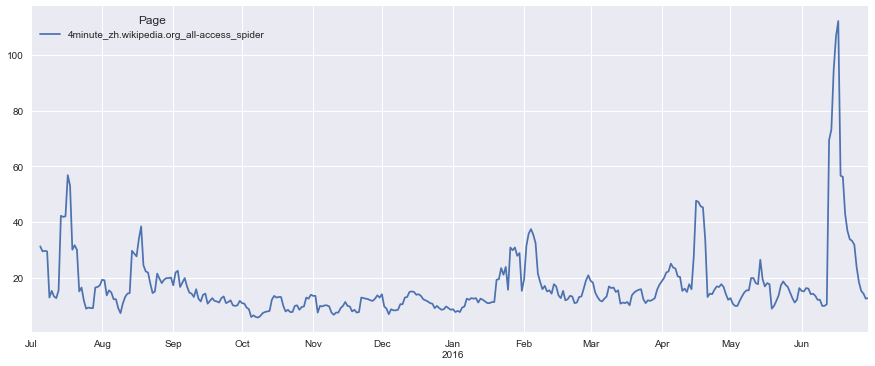

In [20]:
trial1["2015-07":"2016-06"].rolling(window=5).mean().plot(figsize=(15,6))

In [21]:
print('Autocorrelation 1: ', trial1[b].autocorr(1))
print('Autocorrelation 7: ', trial1[b].autocorr(7))
print('Autocorrelation 30: ', trial1[b].autocorr(30))
print('Autocorrelation 365: ', trial1[b].autocorr(365))

('Autocorrelation 1: ', 0.11189381714104449)
('Autocorrelation 7: ', 0.047815725130894215)
('Autocorrelation 30: ', 0.01826179092762063)
('Autocorrelation 365: ', -0.019224587618253176)


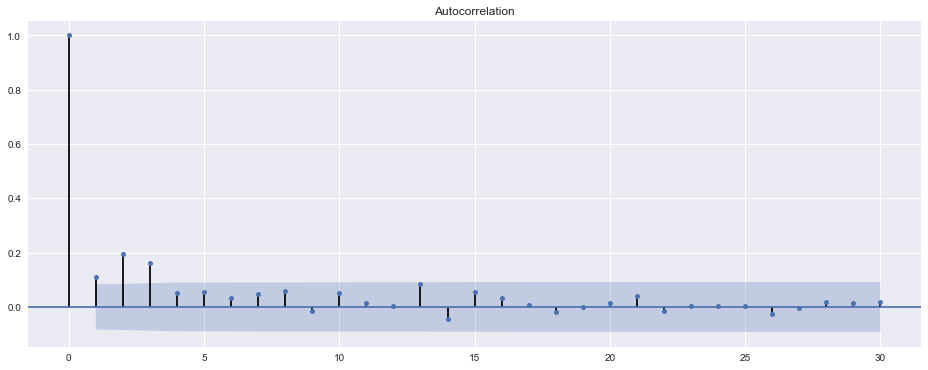

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(16,6))
plot_acf(trial1[b], lags=30, ax=ax)
plt.show()

In [23]:
n = len(trial1[b])

train1 = trial1[b][:int(.75*n)]
test1 = trial1[b][int(.75*n):]

In [24]:
test1.tail()

2016-12-27    11.0
2016-12-28    17.0
2016-12-29    19.0
2016-12-30    10.0
2016-12-31    11.0
Name: 4minute_zh.wikipedia.org_all-access_spider, dtype: float64

In [27]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

('Mean absolute error: ', 7.8196001080427049)


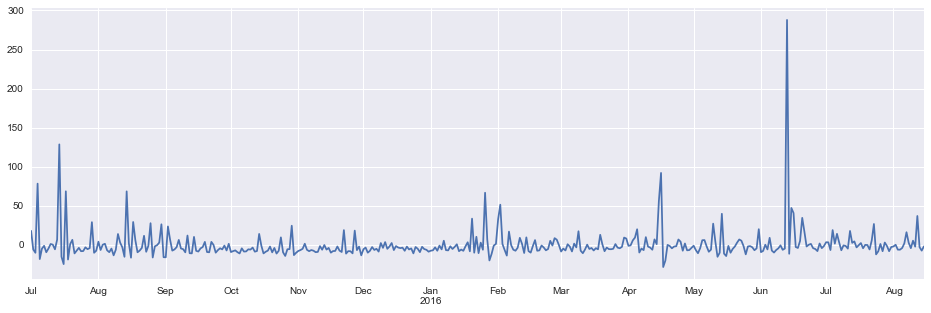

In [79]:
model = sm.tsa.ARIMA(train1, (2, 0, 0)).fit() #2 taken from autocorrelation graph

predictions = model.predict(
    '2016-08-16',
    '2016-12-31'
)

print("Mean absolute error: ", mean_absolute_error(test1, predictions))
model.summary()
model.resid.plot(figsize=(16,5))

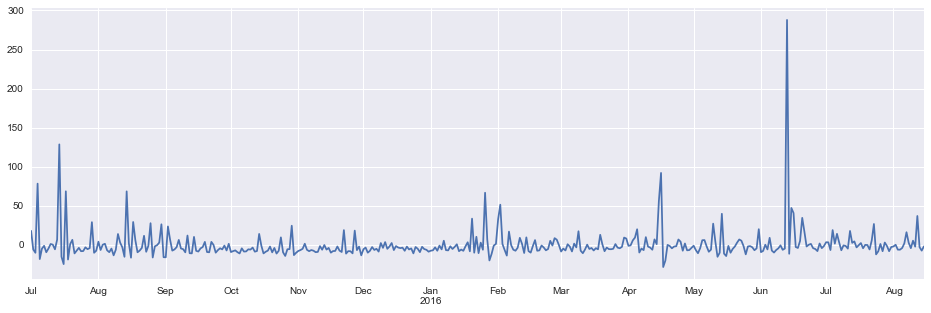

In [80]:
model.resid.plot(figsize=(16,5))

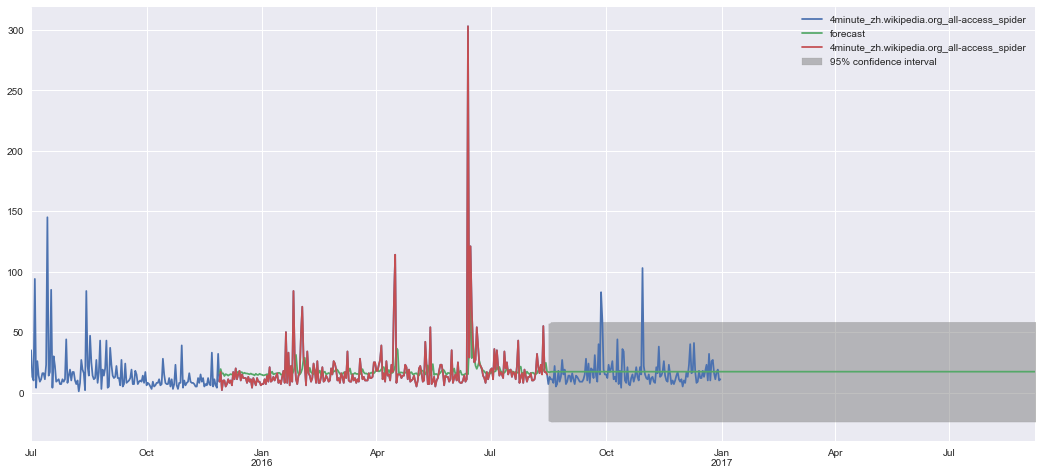

In [81]:
fig, ax = plt.subplots(figsize=(18,8))
trial1["2015-07": "2016-12"].plot(ax=ax)

model.plot_predict(start=150, end=800, ax=ax)
plt.show()

In [98]:
page2 = trial1[b]

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(page2['2016-08-16': '2016-12-31'], predictions))

print rms

12.7776201686


## TRIAL 2

In [31]:
a = web_name[100]
trial2 = train[[a]]

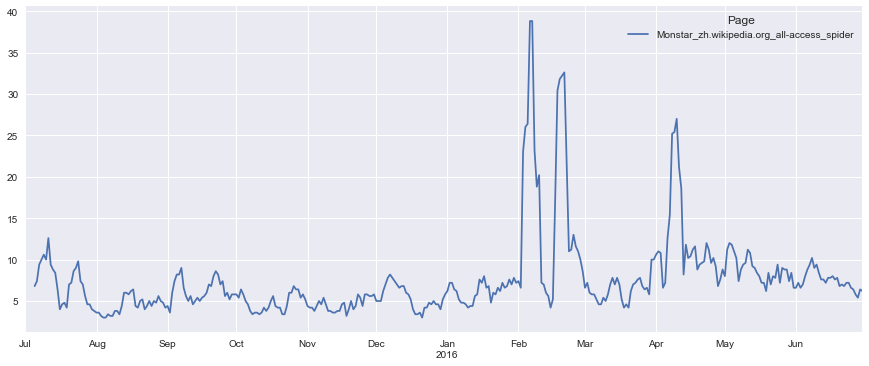

In [32]:
trial2["2015-07":"2016-06"].rolling(window=5).mean().plot(figsize=(15,6))

In [33]:
print('Autocorrelation 1: ', trial2[a].autocorr(1))
print('Autocorrelation 7: ', trial2[a].autocorr(7))
print('Autocorrelation 30: ', trial2[a].autocorr(30))
print('Autocorrelation 365: ', trial2[a].autocorr(365))

('Autocorrelation 1: ', 0.22943127893836168)
('Autocorrelation 7: ', 0.094284609341583503)
('Autocorrelation 30: ', 0.012716728556051432)
('Autocorrelation 365: ', 0.00066857670674228171)


In [34]:
a

'Monstar_zh.wikipedia.org_all-access_spider'

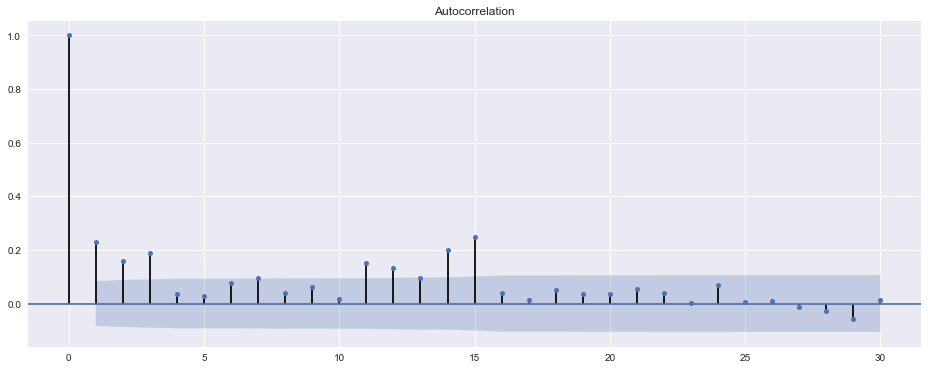

In [35]:
fig, ax = plt.subplots(figsize=(16,6))
plot_acf(trial2[a], lags=30, ax=ax)
plt.show()

In [84]:
n = len(trial2[a])

train2 = trial2[a][:int(.75*n)]
test2 = trial2[a][int(.75*n):]

('Mean absolute error: ', 9.2435059937402499)


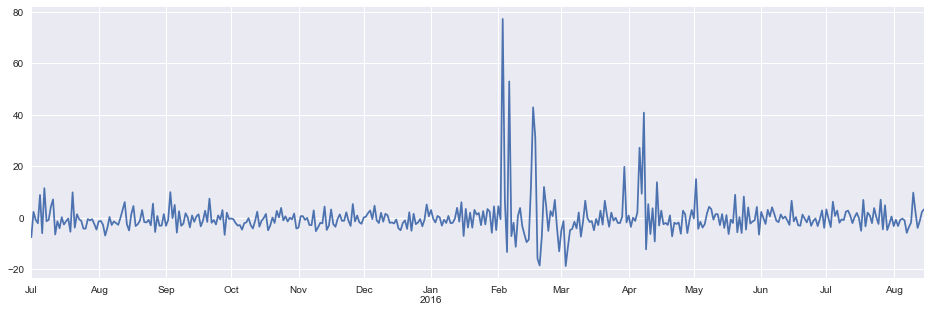

In [85]:
model = sm.tsa.ARIMA(train2, (15, 0, 0)).fit()

predictions2 = model.predict(
    '2016-08-16',
    '2016-12-31'
)

print("Mean absolute error: ", mean_absolute_error(test2, predictions))
model.summary()
model.resid.plot(figsize=(16,5))

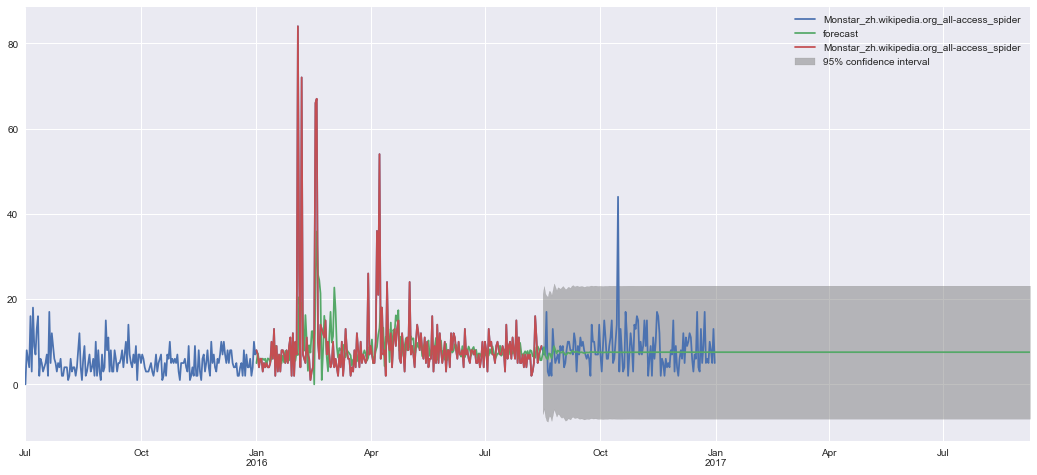

In [86]:
fig, ax = plt.subplots(figsize=(18,8))
trial2["2015-07": "2016-12"].plot(ax=ax)

model.plot_predict(start="2016-01-01", end=800, ax=ax)
plt.show()

In [87]:
print predictions

2016-08-16    17.026823
2016-08-17    16.811452
2016-08-18    17.187711
2016-08-19    17.178096
2016-08-20    17.250554
2016-08-21    17.254908
2016-08-22    17.269395
2016-08-23    17.271488
2016-08-24    17.274489
2016-08-25    17.275155
2016-08-26    17.275797
2016-08-27    17.275981
2016-08-28    17.276122
2016-08-29    17.276170
2016-08-30    17.276202
2016-08-31    17.276214
2016-09-01    17.276221
2016-09-02    17.276224
2016-09-03    17.276226
2016-09-04    17.276227
2016-09-05    17.276227
2016-09-06    17.276227
2016-09-07    17.276227
2016-09-08    17.276227
2016-09-09    17.276227
2016-09-10    17.276227
2016-09-11    17.276227
2016-09-12    17.276227
2016-09-13    17.276227
2016-09-14    17.276227
                ...    
2016-12-02    17.276227
2016-12-03    17.276227
2016-12-04    17.276227
2016-12-05    17.276227
2016-12-06    17.276227
2016-12-07    17.276227
2016-12-08    17.276227
2016-12-09    17.276227
2016-12-10    17.276227
2016-12-11    17.276227
2016-12-12    17

In [93]:
print trial2[a]

2015-07-01     0.0
2015-07-02     8.0
2015-07-03     6.0
2015-07-04     4.0
2015-07-05    16.0
2015-07-06     3.0
2015-07-07    18.0
2015-07-08     9.0
2015-07-09     7.0
2015-07-10    13.0
2015-07-11    16.0
2015-07-12     2.0
2015-07-13     6.0
2015-07-14     5.0
2015-07-15     3.0
2015-07-16     4.0
2015-07-17     5.0
2015-07-18     7.0
2015-07-19     2.0
2015-07-20    17.0
2015-07-21     5.0
2015-07-22    12.0
2015-07-23     9.0
2015-07-24     6.0
2015-07-25     5.0
2015-07-26     3.0
2015-07-27     5.0
2015-07-28     4.0
2015-07-29     6.0
2015-07-30     2.0
              ... 
2016-12-02     2.0
2016-12-03     6.0
2016-12-04     8.0
2016-12-05     6.0
2016-12-06    12.0
2016-12-07     5.0
2016-12-08    11.0
2016-12-09     9.0
2016-12-10    10.0
2016-12-11    12.0
2016-12-12    11.0
2016-12-13     6.0
2016-12-14     3.0
2016-12-15     7.0
2016-12-16     6.0
2016-12-17    17.0
2016-12-18     4.0
2016-12-19     3.0
2016-12-20    13.0
2016-12-21     5.0
2016-12-22     9.0
2016-12-23  

In [94]:
page = trial2[a]

In [95]:
page["2016-01-01": "2016-06"]

2016-01-01     8.0
2016-01-02     7.0
2016-01-03     4.0
2016-01-04     6.0
2016-01-05     6.0
2016-01-06     3.0
2016-01-07     5.0
2016-01-08     4.0
2016-01-09     5.0
2016-01-10     4.0
2016-01-11     4.0
2016-01-12     5.0
2016-01-13    10.0
2016-01-14     6.0
2016-01-15    13.0
2016-01-16     2.0
2016-01-17     9.0
2016-01-18     3.0
2016-01-19     7.0
2016-01-20     3.0
2016-01-21     8.0
2016-01-22     8.0
2016-01-23     7.0
2016-01-24     5.0
2016-01-25     8.0
2016-01-26     5.0
2016-01-27     9.0
2016-01-28    11.0
2016-01-29     2.0
2016-01-30    12.0
              ... 
2016-06-01     8.0
2016-06-02     8.0
2016-06-03     4.0
2016-06-04    12.0
2016-06-05     8.0
2016-06-06    12.0
2016-06-07    11.0
2016-06-08     8.0
2016-06-09     6.0
2016-06-10    10.0
2016-06-11     7.0
2016-06-12     7.0
2016-06-13     8.0
2016-06-14     4.0
2016-06-15    13.0
2016-06-16     7.0
2016-06-17     8.0
2016-06-18     6.0
2016-06-19     5.0
2016-06-20     8.0
2016-06-21     8.0
2016-06-22  

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms2 = sqrt(mean_squared_error(page['2016-08-16': '2016-12-31'], predictions2))

In [103]:
print rms2

5.05451497322
